### Lib


In [1]:
import os
import pandas as pd
import csv
import pandas as pd
import re
import random
import string
import ast
from ast import literal_eval
import numpy as np

import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)

import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12, 6)})

from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.prompt { min-width:10ex !important; }</style>"))
display(HTML("<style>div#notebook { font-size:12px !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anastasiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anastasiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Anastasiya\AppData\Local\Temp\ipykernel_2148\1412549862.py:31: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output
C:\Users\Anastasiya\AppData\Local\Temp\ipykernel_2148\1412549862.py:31: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output


### Data

In [7]:
log = pd.read_csv('E:/Anastasiya/PycharmProjects/contest/anastasiya.belousova/train/logs.csv')
genres = pd.read_csv('E:/Anastasiya/PycharmProjects/contest/anastasiya.belousova/train/genres.csv')
movies = pd.read_csv('E:/Anastasiya/PycharmProjects/contest/anastasiya.belousova/train/movies.csv')
staff = pd.read_csv('E:/Anastasiya/PycharmProjects/contest/anastasiya.belousova/train/staff.csv')
countries = pd.read_csv('E:/Anastasiya/PycharmProjects/contest/anastasiya.belousova/train/countries.csv')

In [8]:
log.head()

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06T15:00:00.071114+03:00,10250,427.0,485.0
1,1,2023-04-06T15:00:01.123928+03:00,2062,1521.0,129.0
2,2,2023-04-06T15:00:03.957246+03:00,12980,4598.0,2795.0
3,3,2023-04-06T15:00:04.990565+03:00,30646,5324.0,5094.0
4,4,2023-04-06T15:00:10.495017+03:00,43069,4291.0,75.0


# EDA

## genres

In [9]:
genres.head()

,id,name
0,2,Сказка
1,8,Здоровье
2,17,Наука
3,24,Комедийная мелодрама
4,38,Мистика


In [10]:
genres.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      96 non-null     int64 
 1   name    96 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
genres.nunique()

id      96
name    96
dtype: int64

## movies


In [11]:
movies.head()

,id,name,year,date_publication,description,genres,countries,staff
0,0,"Мама, я дома",2022-01-01,2022-11-23T00:00:00,Где-то в глубинке вместе с дочерью и внуком жи...,[97],[238],"[1883, 33655, 25890, 1001, 12051, 10110, 16895]"
1,1,Три метра над уровнем неба,2010-01-01,NaN,"История любви парня и девушки, принадлежащих к...","[138, 97, 294]",[242],"[18168, 23444, 10850, 21847, 30555, 24469, 268..."
2,2,Детектив ди и тайна призрачного пламени,2010-01-01,NaN,"690 год нашей эры, Китай. Первая императрица д...","[294, 302]","[250, 117]","[3933, 19953, 32174, 30640, 14127, 32141, 2549..."
3,3,Капитан,2017-01-01,2022-10-20T00:00:00,Вторая мировая война подходит к концу. В это в...,"[97, 303, 143, 319]","[188, 212, 0]","[16006, 12217, 30668, 28806, 16172, 5045, 1663..."
4,4,Лазурный берег,2015-01-01,2023-01-12T00:00:00,У бывшей танцовщицы Ванессы и писателя Роланда...,"[138, 97]","[1, 102, 0]","[23586, 8823, 8040, 34555, 32484, 18446]"


In [ ]:
movies.nunique()

id                  7427
name                7223
year                  99
date_publication     576
description         6822
genres               862
countries            586
staff               6258
dtype: int64

In [ ]:
movies.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7427 entries, 0 to 7426
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7427 non-null   int64 
 1   name              7427 non-null   object
 2   year              7427 non-null   object
 3   date_publication  4923 non-null   object
 4   description       7288 non-null   object
 5   genres            7427 non-null   object
 6   countries         7427 non-null   object
 7   staff             7427 non-null   object
dtypes: int64(1), object(7)
memory usage: 464.3+ KB


# Preprocess
## year


In [ ]:
# Assuming 'year' is the name of the column containing the date in 'YYYY-MM-DD' format
movies['year'] = pd.to_datetime(movies['year']).dt.year


In [ ]:
# Фильтрация по колонке 'year'
filtered_movies = movies[movies['year'] < 1924]

# Вывод результатов
print(filtered_movies)

        id                                   name  year     date_publication  \
707    707                          _test_gs_labs  1900                  NaN   
2998  2998                              Поллианна  1912                  NaN   
3531  3531                   Джентельмены, удачи!  1895                  NaN   
4962  4962  Лос-ан-Гоэль. Руководство прилагается  1895  2023-01-13T00:00:00   
5020  5020                    Благодатный дневник  1895                  NaN   
5313  5313                      Бемби (спектакль)  1923                  NaN   
6631  6631                             Белый Клык  1906  2022-11-24T00:00:00   

                                            description      genres countries  \
707                                                 NaN          []        []   
2998  Юная сирота Поллианна переезжает к своей тетке...  [169, 360]        []   
3531            Джентельмены, удачи! х/ф (2012, Россия)          []        []   
4962           В эфире телеканала х

В строке id = 707 - тестовые данные. Удалим эту строку. Также вызывают сомнения строки с годом выпуска  < 1900 года. В сети найдем реальный год выпуска этих фильмов и заменим данные на верные: \
Джентельмены, удачи! - 2012 \
Лос-ан-Гоэль. Руководство прилагается - 2014 \
Благодатный дневник - 2023 \
Бемби (спектакль) - 1995.



In [ ]:
id_to_delete = 707
movies.drop(movies[movies['id'] == id_to_delete].index, inplace=True)
movies.loc[movies['name'] == "Джентельмены, удачи!", 'year'] = 2012
movies.loc[movies['name'] == "Лос-ан-Гоэль. Руководство прилагается", 'year'] = 2014
movies.loc[movies['name'] == "Благодатный дневник", 'year'] = 2023
movies.loc[movies['name'] == "Бемби (спектакль)", 'year'] = 1995

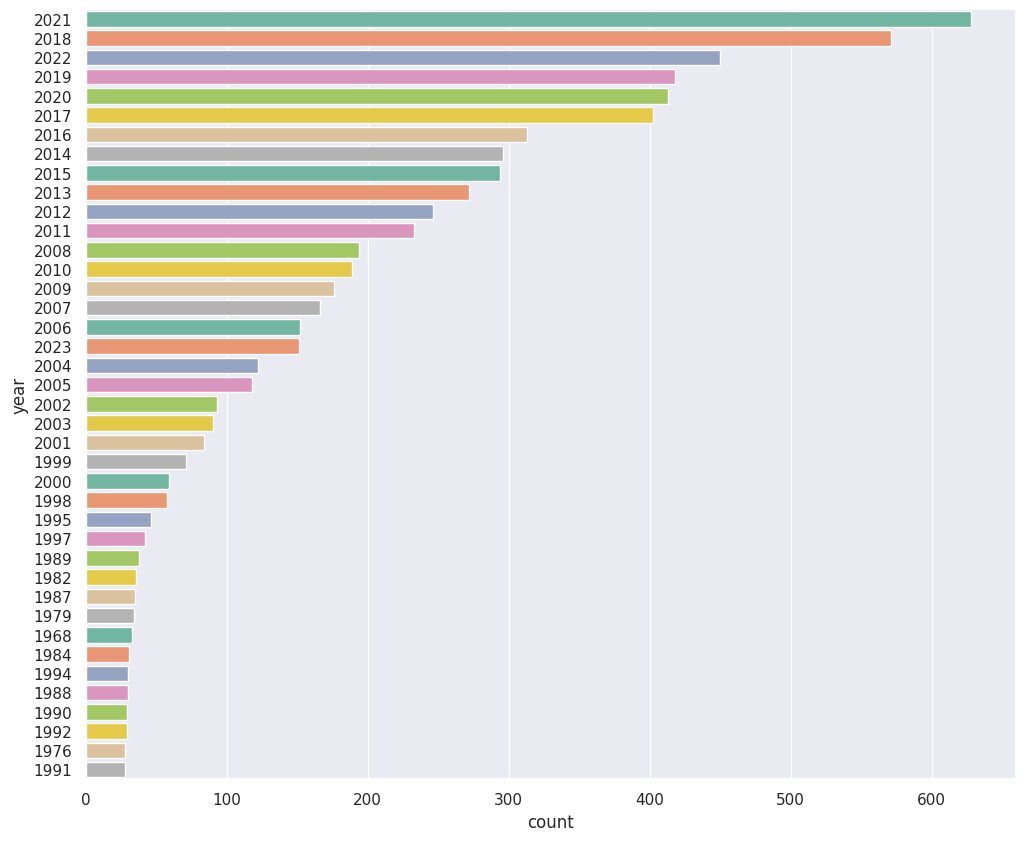

In [ ]:
# Анализ года выпуска фильмов
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='year', data = movies, palette = "Set2", order = movies['year'].value_counts().index[0:40])

In [ ]:
movies[movies['year'].isna()].head()

,id,name,year,date_publication,description,genres,countries,staff


In [ ]:
movies['year'] = movies['year'].astype('category')

## genres

In [12]:
movies.genres.value_counts()

[97]                        529
[46]                        417
[198]                       270
[85, 97]                    266
[85, 46]                    221
                           ... 
[138, 97, 303, 319]           1
[296, 223]                    1
[46, 303, 158, 218, 294]      1
[46, 266, 223]                1
[138, 97, 46, 143]            1
Name: genres, Length: 862, dtype: int64

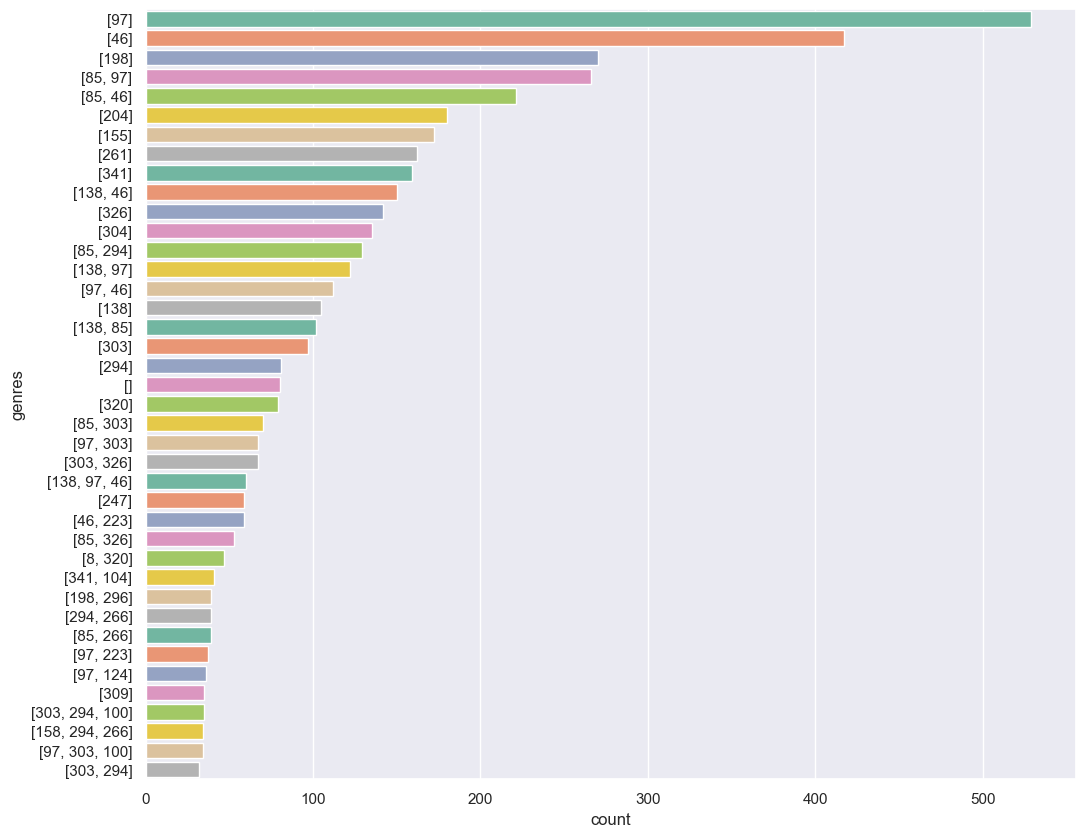

In [13]:
# Анализ жанров фильмов
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='genres', data = movies, palette = "Set2", order = movies['genres'].value_counts().index[0:40])

In [14]:
# Create a dictionary mapping genre IDs to genre names
genre_id_to_name = dict(zip(genres['id'], genres['name']))
def replace_genre_ids(genre_ids):
    return [genre_id_to_name[int(id_)] for id_ in ast.literal_eval(genre_ids) if int(id_) in genre_id_to_name]
def clean_and_lower(genre_list):
    cleaned_genres = [genre.lower().translate(str.maketrans("", "", string.punctuation)) for genre in genre_list]
    return cleaned_genres

# Replace genre IDs with genre names in the 'genres' column
movies['genres_name'] = movies['genres'].apply(replace_genre_ids)  
movies['genres_name'] = movies['genres_name'].apply(clean_and_lower)  

In [16]:
movies['genres_name'] = movies['genres_name'].apply(lambda x: ', '.join(x))


In [17]:
movies.head()

,id,name,year,date_publication,description,genres,countries,staff,genres_name
0,0,"Мама, я дома",2022-01-01,2022-11-23T00:00:00,Где-то в глубинке вместе с дочерью и внуком жи...,[97],[238],"[1883, 33655, 25890, 1001, 12051, 10110, 16895]",драма
1,1,Три метра над уровнем неба,2010-01-01,NaN,"История любви парня и девушки, принадлежащих к...","[138, 97, 294]",[242],"[18168, 23444, 10850, 21847, 30555, 24469, 268...","мелодрама, драма, боевик"
2,2,Детектив ди и тайна призрачного пламени,2010-01-01,NaN,"690 год нашей эры, Китай. Первая императрица д...","[294, 302]","[250, 117]","[3933, 19953, 32174, 30640, 14127, 32141, 2549...","боевик, фэнтези"
3,3,Капитан,2017-01-01,2022-10-20T00:00:00,Вторая мировая война подходит к концу. В это в...,"[97, 303, 143, 319]","[188, 212, 0]","[16006, 12217, 30668, 28806, 16172, 5045, 1663...","драма, триллер, военный, история"
4,4,Лазурный берег,2015-01-01,2023-01-12T00:00:00,У бывшей танцовщицы Ванессы и писателя Роланда...,"[138, 97]","[1, 102, 0]","[23586, 8823, 8040, 34555, 32484, 18446]","мелодрама, драма"


In [ ]:
# Привести столбец к типу данных category
movies['genres'] = movies['genres'].astype('category')

## countries

In [ ]:
movies.countries.value_counts()

[102]                   2158
[238]                   1755
[205]                    709
[0]                      235
[122, 102]               230
                        ... 
[122, 10, 102]             1
[175, 109, 0]              1
[170, 216]                 1
[57]                       1
[122, 117, 102, 166]       1
Name: countries, Length: 586, dtype: int64

In [ ]:
movies[movies.countries.isna()].shape

(0, 8)

In [ ]:
movies['countries'] = movies['countries'].astype('category')

## descriptions

In [ ]:
# Фильтрация по NaN в колонке 'description'
nan_description_movies = movies.loc[movies['description'].isna()]

# Вывод результатов
print(nan_description_movies)

        id                                 name  year     date_publication  \
7        7            FOMENKO_ПРОГРАММЫ Серия 1  2018                  NaN   
80      80                            Клеопатра  1934                  NaN   
106    106              Общество мертвых поэтов  1989                  NaN   
113    113                             Крепись!  2014                  NaN   
142    142           Концерт Стаса Старовойтова  2016  2021-04-23T00:00:00   
...    ...                                  ...   ...                  ...   
7050  7050                           Приколисты  2009                  NaN   
7101  7101                              В эфире  2022                  NaN   
7105  7105  Лига справедливости: Боги и монстры  2015                  NaN   
7155  7155                  WM (Aquos) Original  2022  2022-08-17T00:00:00   
7172  7172   CHERNOBYL_101_dolbi_and_stereo.mp4  2020                  NaN   

     description          genres countries  \
7            NaN 

In [ ]:
# Заполняем пустые значения в 'descriptions'
movies['description'] = movies.apply(lambda row: f"{row['name']} {row['year']}" if pd.isnull(row['description']) else row['description'], axis=1)

In [ ]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def preprocess_text(text):
    if isinstance(text, str):  # Check if 'text' is a string
        # Tokenization
        tokens = word_tokenize(text, language='russian')
        # Remove punctuation, convert to lowercase, and remove stopwords
        tokens = [remove_punct(token) for token in tokens]
        tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('russian')]
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string for non-string values

# Применим предварительную обработку к столбцу "description" и сохраним результат
movies['description'] = movies['description'].apply(preprocess_text)
movies.head()

,id,name,year,date_publication,description,genres,countries,staff
0,0,"Мама, я дома",2022,2022-11-23T00:00:00,гдето глубинке вместе дочерью внуком живет тон...,[97],[238],"[1883, 33655, 25890, 1001, 12051, 10110, 16895]"
1,1,Три метра над уровнем неба,2010,NaN,история любви парня девушки принадлежащих раз...,"[138, 97, 294]",[242],"[18168, 23444, 10850, 21847, 30555, 24469, 268..."
2,2,Детектив ди и тайна призрачного пламени,2010,NaN,690 год нашей эры китай первая императрица д...,"[294, 302]","[250, 117]","[3933, 19953, 32174, 30640, 14127, 32141, 2549..."
3,3,Капитан,2017,2022-10-20T00:00:00,вторая мировая война подходит концу это время...,"[97, 303, 143, 319]","[188, 212, 0]","[16006, 12217, 30668, 28806, 16172, 5045, 1663..."
4,4,Лазурный берег,2015,2023-01-12T00:00:00,бывшей танцовщицы ванессы писателя роланда про...,"[138, 97]","[1, 102, 0]","[23586, 8823, 8040, 34555, 32484, 18446]"


## staff

Данный столбец разделим на 2: actors, director

In [ ]:
# Функция для преобразования строки в список id
def str_to_list(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []

# Преобразование строк в списки в колонке 'staff'
movies['staff'] = movies['staff'].apply(str_to_list)

# Функция для получения актеров из списка id
def get_actors(id_list):
    actors = staff[(staff['id'].isin(id_list)) & (staff['role'] == 'actor')]['name']
    return ', '.join(actors)

# Функция для получения режиссера из списка id
def get_director(id_list):
    director = staff[(staff['id'].isin(id_list)) & (staff['role'] == 'director')]['name'].values
    return ', '.join(director) if len(director) > 0 else None

# Добавление колонок 'actors' и 'director' к датафрейму 'movies'
movies['actors'] = movies['staff'].apply(get_actors)
movies['director'] = movies['staff'].apply(get_director)

In [ ]:
movies['director'] = movies['director'].fillna('Unknown')

In [ ]:
movies['director'] = movies['director'].str.lower()

In [ ]:
movies['director'] = movies['director'].astype('category')

In [ ]:
movies['actors'] = movies['actors'].fillna('Unknown')

In [ ]:
movies['actors'] = movies['actors'].astype('category')

In [ ]:
# Удаляем столбец 'staff'
movies = movies.drop('staff', axis=1)

## date publication
 Добавим столбцы month и year

In [ ]:
# Assuming 'date_publication' is the name of the column containing the date in 'YYYY-MM-DD' format
movies['date_publication'] = pd.to_datetime(movies['date_publication'])
movies['year_publication'] = movies['date_publication'].dt.year.fillna(0).astype('category')
movies['month_publication'] = movies['date_publication'].dt.month.fillna(0).astype('category')
movies.drop('date_publication', axis=1, inplace=True)

movies.head()

,id,name,year,description,genres,countries,actors,director,year_publication,month_publication
0,0,"Мама, я дома",2022,гдето глубинке вместе дочерью внуком живет тон...,[97],[238],"Екатерина Шумакова, Мажит Жангузаров, Юра Бори...",unknown,2022.0,11.0
1,1,Три метра над уровнем неба,2010,история любви парня девушки принадлежащих раз...,"[138, 97, 294]",[242],"Мария Вальверде, Кристина Плазас, Марио Касас,...",фернандо гонзалез молина,0.0,0.0
2,2,Детектив ди и тайна призрачного пламени,2010,690 год нашей эры китай первая императрица д...,"[294, 302]","[250, 117]","Цинь Янь, Тони Люн Ка-Фай, Цзиньшань Лю, Цзяли...",цуй харк,0.0,0.0
3,3,Капитан,2017,вторая мировая война подходит концу это время...,"[97, 303, 143, 319]","[188, 212, 0]","Макс Хубахер, Йорн Хеншел, Харальд Вармбрунн, ...",роберт швентке,2022.0,10.0
4,4,Лазурный берег,2015,бывшей танцовщицы ванессы писателя роланда про...,"[138, 97]","[1, 102, 0]","Анджелина Джоли, Мельвиль Пупо, Мелани Лоран, ...",анджелина джоли,2023.0,1.0


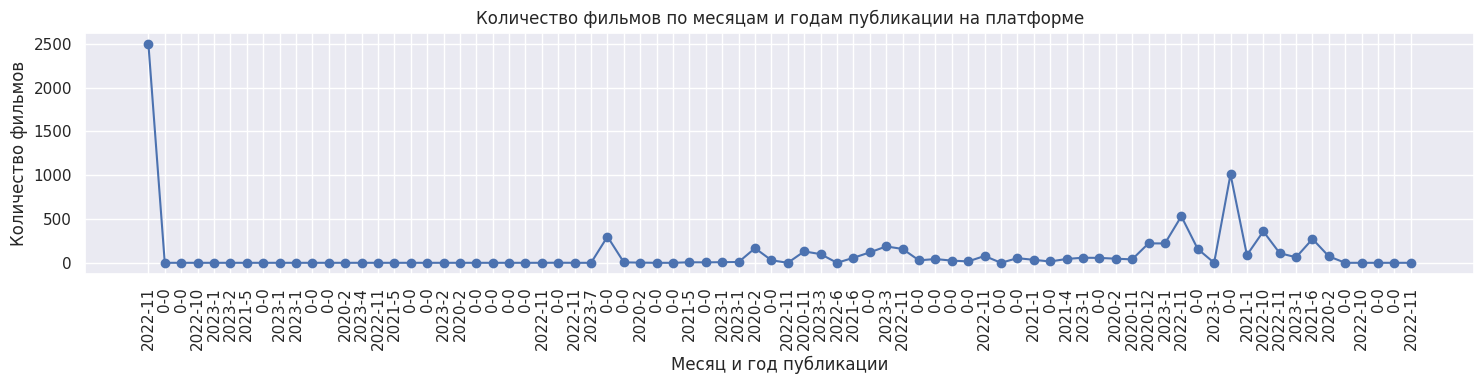

In [ ]:
movies = movies.sort_values(by=['year_publication', 'month_publication'])

# Подсчет количества фильмов для каждого месяца и года
movie_counts = movies.groupby(['year_publication', 'month_publication']).size().reset_index(name='count')

movie_counts['year_publication'] = movies['year_publication'].astype(int)
movie_counts['month_publication'] = movies['month_publication'].astype(int)

plt.figure(figsize=(15, 4))
plt.plot(movie_counts['count'], marker='o')
plt.title('Количество фильмов по месяцам и годам публикации на платформе')
plt.xlabel('Месяц и год публикации')
plt.ylabel('Количество фильмов')
plt.xticks(range(len(movie_counts)), [f"{year}-{month}" for year, month in zip(movie_counts['year_publication'], movie_counts['month_publication'])], rotation=90)
plt.tight_layout()
plt.show()

# Duplicates check

In [ ]:
movies.duplicated(subset=['id'], keep=False).sum()

0

In [ ]:
movies.duplicated(subset=['name'], keep=False).sum()

390

In [ ]:
movies[movies.duplicated(subset=['name', 'countries', 'genres', 'director'], keep=False)].sort_values('name')

,id,name,year,description,genres,countries,actors,director,year_publication,month_publication
1326,1326,PREMIER,2021,эксклюзивные российские сериалы фильмы шоу pr...,[],[],,unknown,0.0,0.0
4975,4975,PREMIER,2022,эксклюзивные российские сериалы фильмы шоу ви...,[],[],,unknown,0.0,0.0
5764,5764,Вински и порошок-невидимка,2021,вински – 10летний мальчик который уверен всё...,"[46, 302, 130]",[25],"Микко Леппилампи, Куура Росси, Пирьо Хейккиля,...",юха вуолиоки,2023.0,1.0
5994,5994,Вински и порошок-невидимка,2020,вински порошокневидимка 2020,"[46, 302, 130]",[25],"Микко Леппилампи, Куура Росси, Пирьо Хейккиля,...",юха вуолиоки,0.0,0.0
5710,5710,Кукла,2016,молодая девушка грета устраивается работать ня...,[326],"[121, 117, 102]","Диана Хардкэсл, Джим Нортон, Бен Робсон, Джейм...",уильям брент белл,0.0,0.0
6493,6493,Кукла,2015,молодая девушка грета устраивается работать ня...,[326],"[121, 117, 102]","Мэттью Уолкер, Лили Патер, Джетт Клине, Диана ...",уильям брент белл,0.0,0.0
452,452,Любовь случается,2009,писатель берк райан помогает своим читателям о...,[138],"[122, 121, 102]","Джон Кэрролл Линч, Клайд Кусацу, Фрэнсис Конро...",брэндон кэмп,0.0,0.0
7297,7297,Любовь случается,2008,писатель берк райан помогает своим читателям о...,[138],"[122, 121, 102]","Джон Кэрролл Линч, Фрэнсис Конрой, Аарон Экхар...",брэндон кэмп,0.0,0.0
4822,4822,Мания Жизели,1996,история великой русской балерины ольги спесивц...,[97],[238],"Евгений Сидихин, Андрей Смирнов, Галина Тюнина...",алексей учитель,0.0,0.0
7027,7027,Мания Жизели,1995,история великой русской балерины ольги спесивц...,[97],[238],"Алексей Герман, Евгений Сидихин, Александр Хва...",алексей учитель,0.0,0.0


Дубликаты по названию фильма есть, но так как год выпуска отличается, это может быть сериал, либо передачи. Пока не будем удалять.

In [ ]:
movies.duplicated(subset=['name', 'countries', 'year', 'director'], keep=False).sum()

0

# Result


In [ ]:
movies.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7426 entries, 1 to 7267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 7426 non-null   int64   
 1   name               7426 non-null   object  
 2   year               7426 non-null   category
 3   description        7426 non-null   object  
 4   genres             7426 non-null   category
 5   countries          7426 non-null   category
 6   actors             7426 non-null   category
 7   director           7426 non-null   category
 8   year_publication   7426 non-null   category
 9   month_publication  7426 non-null   category
dtypes: category(7), int64(1), object(2)
memory usage: 968.1+ KB


## LOG

In [ ]:
logs = pd.read_csv('logs.csv')
log.head()

,id,datetime,user_id,movie_id,duration
0,0,2023-04-06T15:00:00.071114+03:00,10250,427.0,485.0
1,1,2023-04-06T15:00:01.123928+03:00,2062,1521.0,129.0
2,2,2023-04-06T15:00:03.957246+03:00,12980,4598.0,2795.0
3,3,2023-04-06T15:00:04.990565+03:00,30646,5324.0,5094.0
4,4,2023-04-06T15:00:10.495017+03:00,43069,4291.0,75.0


In [ ]:
logs.shape

(2477905, 5)

In [ ]:
logs.nunique()

id          2477905
datetime    2477904
user_id      207377
movie_id       5283
duration      14374
dtype: int64

## Datetime


In [ ]:

logs['datetime'] = pd.to_datetime(logs['datetime'])

# Получим диапазон дат
date_range_start = logs['datetime'].min().date()
date_range_end = logs['datetime'].max().date()

print(f'Data date range: {date_range_start} - {date_range_end}')

Data date range: 2023-04-06 - 2023-06-14


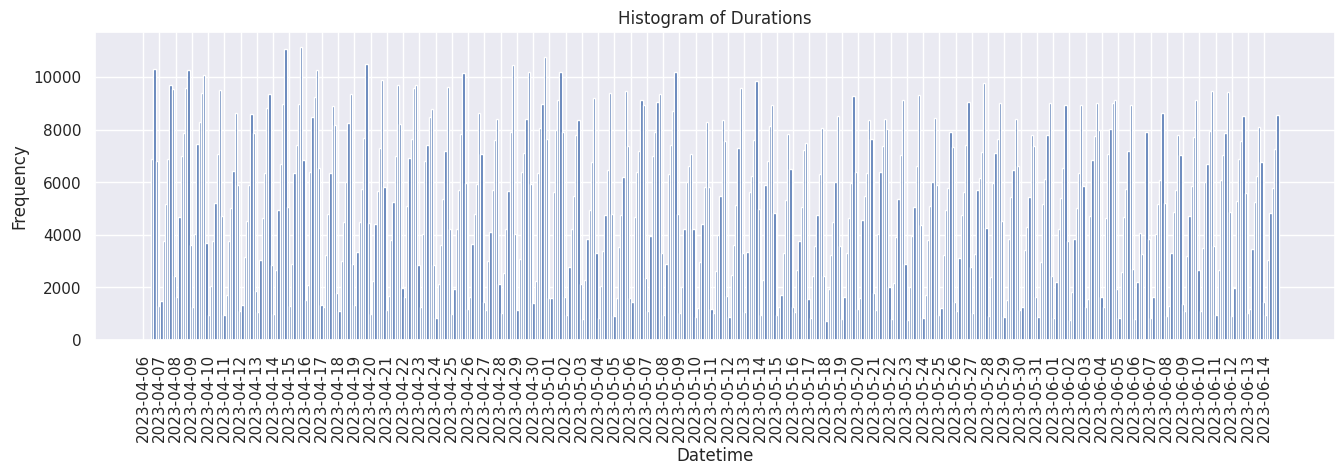

In [ ]:
plt.figure(figsize=(16, 4))
logs['datetime'] = pd.to_datetime(logs['datetime'])
logs['datetime'].hist(bins=500)
plt.xlabel('Datetime')
plt.ylabel('Frequency')

date_range = pd.date_range(date_range_start, date_range_end)
plt.xticks(date_range, rotation=90)

plt.title('Histogram of Durations')
plt.show()

## Duration

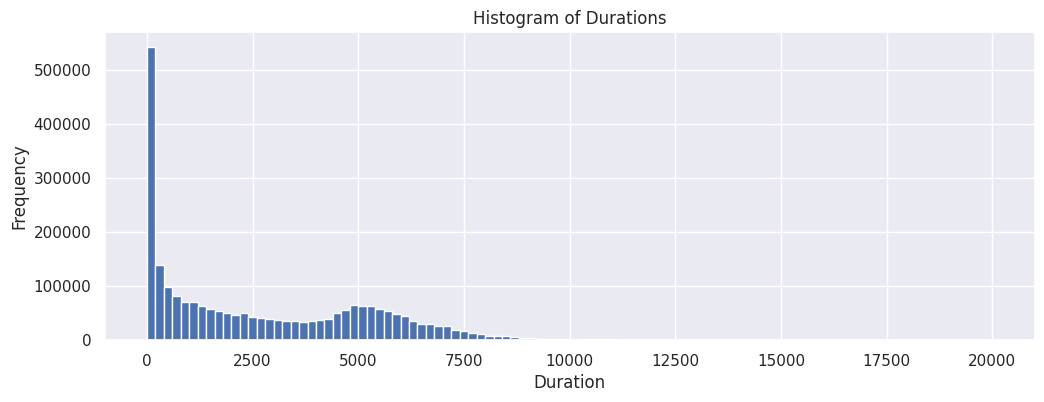

In [ ]:
plt.figure(figsize=(12,4))
logs['duration'].hist(bins=100, range=(0, 20000))
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Durations')
plt.show()

In [ ]:
logs[logs['duration'] > 20000].shape

(363, 5)

В данных нет продолжительности каждого фильма по отдельности. Поэтому возьмем среднее  - 90 минут. Тогда 5% просмотренного фильма - 270, 10% - 540, 20% - 1080 и т.д Сделаем новый столбец.

In [ ]:
# Задаем среднюю продолжительность фильма
average_duration = 5400

# Вычисляем процент просмотра фильма
logs['watched_pct'] = (logs['duration'] / average_duration)

# Округляем до 2 знаков после запятой
logs['watched_pct'] = logs['watched_pct'].round(2)

# Ограничиваем значения до 1 (если они превышают 1)
logs['watched_pct'] = logs['watched_pct'].apply(lambda x: min(x, 1))

# Выводим первые несколько строк DataFrame, чтобы убедиться в правильности добавления нового столбца
print(logs.head())

   id                         datetime  user_id  movie_id  duration  \
0   0 2023-04-06 15:00:00.071114+03:00    10250     427.0     485.0   
1   1 2023-04-06 15:00:01.123928+03:00     2062    1521.0     129.0   
2   2 2023-04-06 15:00:03.957246+03:00    12980    4598.0    2795.0   
3   3 2023-04-06 15:00:04.990565+03:00    30646    5324.0    5094.0   
4   4 2023-04-06 15:00:10.495017+03:00    43069    4291.0      75.0   

   watched_pct  
0         0.09  
1         0.02  
2         0.52  
3         0.94  
4         0.01  


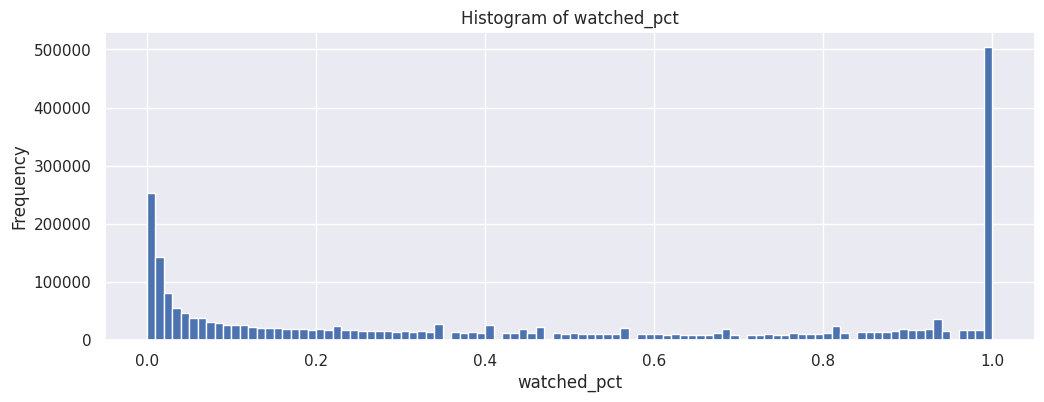

In [ ]:
plt.figure(figsize=(12,4))
logs['watched_pct'].hist(bins=100, range=(0, 1))
plt.xlabel('watched_pct')
plt.ylabel('Frequency')
plt.title('Histogram of watched_pct')
plt.show()

In [ ]:
# Группировка по 'user_id' и агрегация 'movie_id' в список
user_movie_lists = logs.groupby('user_id')['movie_id'].agg(list).reset_index()

# Результат будет датафрейм, где каждая строка представляет пользователя (user_id) и список фильмов, которые он посмотрел
print(user_movie_lists)


        user_id                                           movie_id
0             0  [165.0, 107.0, 6013.0, 2869.0, 5558.0, 5558.0,...
1             1  [6360.0, 6717.0, 2851.0, 2851.0, 2851.0, 6717....
2             2  [6865.0, 5466.0, 2224.0, 3583.0, 1451.0, 138.0...
3             3  [1954.0, 4743.0, 1954.0, 1954.0, 1954.0, 3452....
4             4  [4153.0, 1147.0, 1496.0, 1147.0, 6615.0, 1697....
...         ...                                                ...
207372   263866                                           [2348.0]
207373   263868                                           [6918.0]
207374   263870                                           [6207.0]
207375   263873                                           [5336.0]
207376   263874                                           [5573.0]

[207377 rows x 2 columns]


In [ ]:
# Группируем по 'user_id' и 'movie_id' и подсчитываем количество записей
movie_watched_multiple_times = logs.groupby(['user_id', 'movie_id']).size().reset_index(name='count')

print(movie_watched_multiple_times)


         user_id  movie_id  count
0              0      12.0      5
1              0      74.0     49
2              0     107.0    172
3              0     126.0      6
4              0     165.0      7
...          ...       ...    ...
1652019   263866    2348.0      1
1652020   263868    6918.0      1
1652021   263870    6207.0      1
1652022   263873    5336.0      1
1652023   263874    5573.0      1

[1652024 rows x 3 columns]


In [ ]:
# Сортировка по убыванию
sorted_movie_watched = movie_watched_multiple_times.sort_values(by='count', ascending=False)

# Вывод первых 10 записей
top_10_movies = sorted_movie_watched.head(10)

print(top_10_movies)

        user_id  movie_id  count
185           1    5003.0    363
204           1    5798.0    316
18648        99    2820.0    287
90183       705    6207.0    280
474           3    1954.0    206
10            0     840.0    198
215715     2178    6207.0    177
2             0     107.0    172
25998       149    4745.0    165
120177     1017    1496.0    165


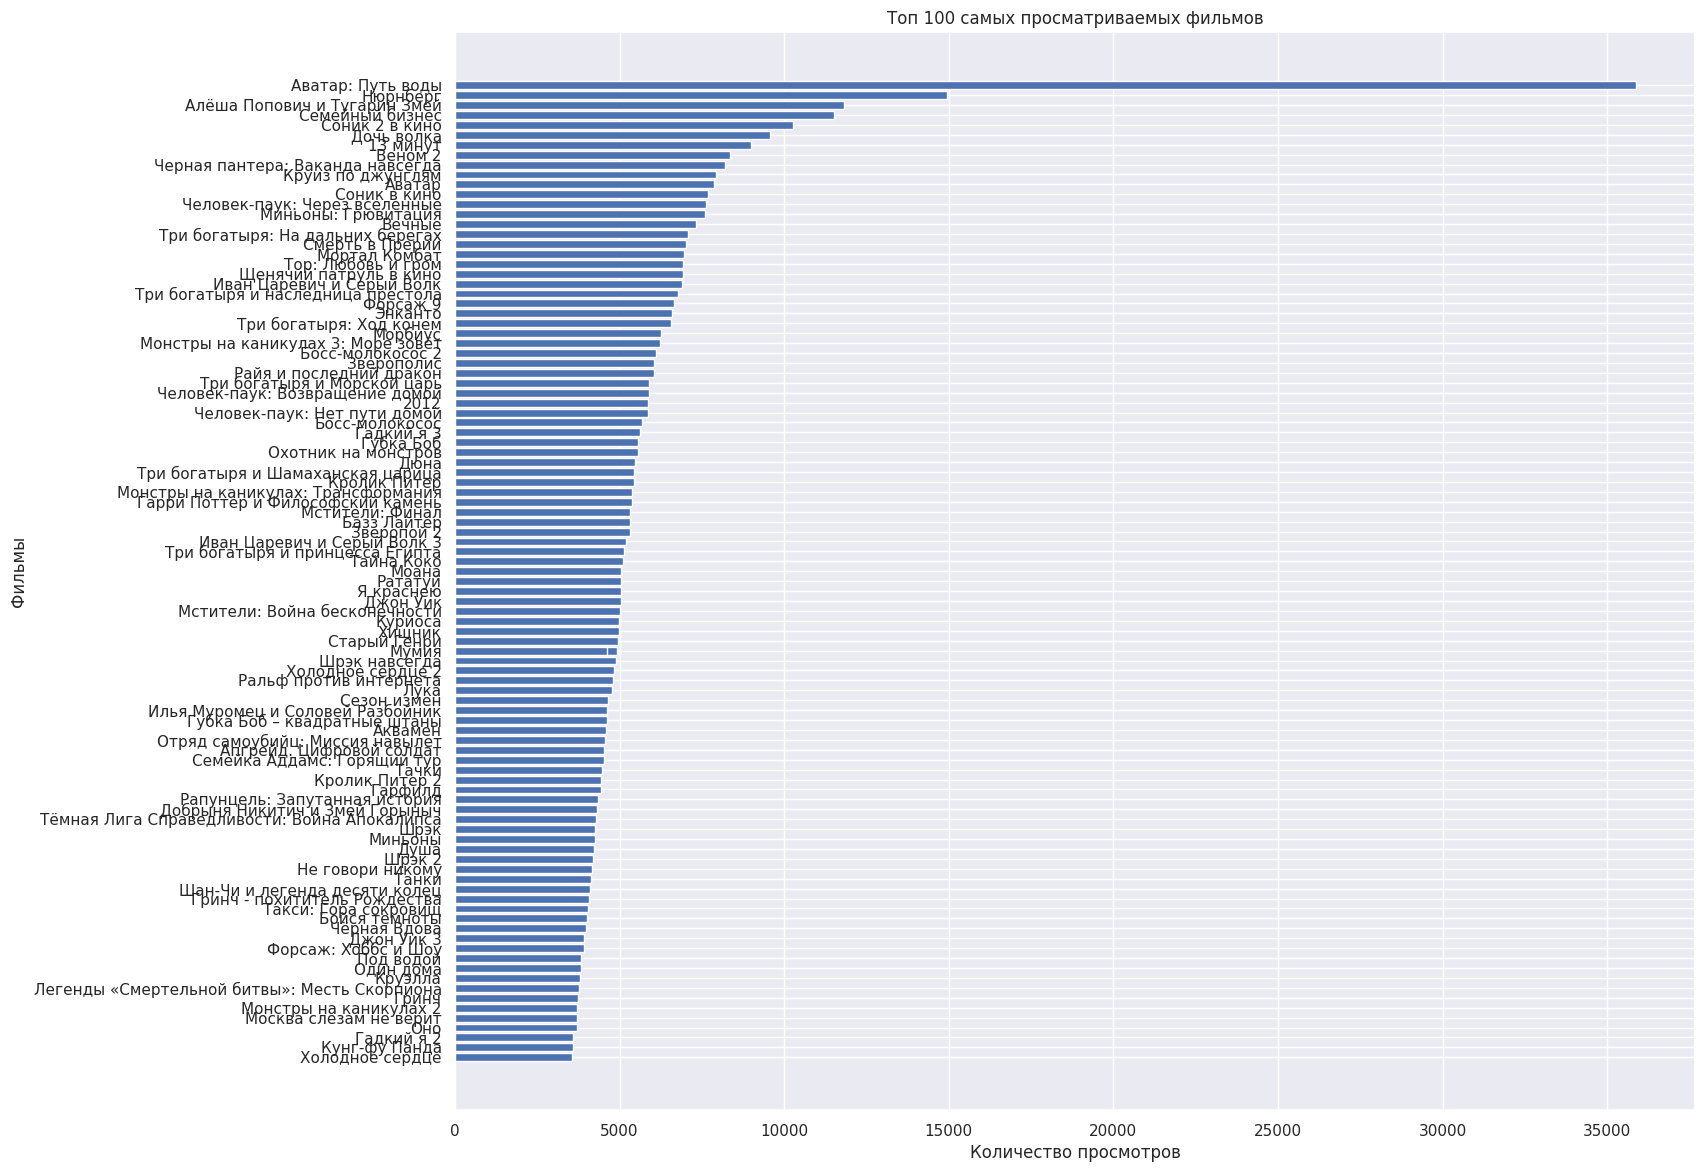

In [ ]:
# Посчитаем количество просмотров для каждого фильма
movie_views = logs['movie_id'].value_counts().reset_index()
movie_views.columns = ['movie_id', 'views']

# Объединим данные о фильмах и количестве просмотров
top_movies = pd.merge(movie_views, movies, left_on='movie_id', right_on='id')

# Отсортируем фильмы по количеству просмотров
top_movies = top_movies.sort_values(by='views', ascending=False)

# Выберем топ 100 фильмов
top_100_movies = top_movies.head(100)

# Сделаем визуализацию
plt.figure(figsize=(16, 14))
plt.barh(top_100_movies['name'], top_100_movies['views'])
plt.xlabel('Количество просмотров')
plt.ylabel('Фильмы')
plt.title('Топ 100 самых просматриваемых фильмов')
plt.gca().invert_yaxis()
plt.show()


## Duplicates check

In [ ]:
logs.duplicated(subset=['id'], keep=False).sum()

0

## Result

In [ ]:
logs.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477905 entries, 0 to 2477904
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype                                
---  ------       --------------    -----                                
 0   id           2477905 non-null  int64                                
 1   datetime     2477905 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   user_id      2477905 non-null  int64                                
 3   movie_id     2477905 non-null  float64                              
 4   duration     2477905 non-null  float64                              
 5   watched_pct  2477905 non-null  float64                              
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), float64(3), int64(2)
memory usage: 113.4 MB


# Some stats


In [ ]:
interaction_users = logs['user_id'].unique()

common_users = len(interaction_users)

print(f'Кол-во пользователей всего - {common_users}')

Кол-во пользователей всего - 207377


In [ ]:
interaction_items = logs['movie_id'].unique()

# определяется количество общих элементов (идентификаторов фильмов),
# которые существуют как в logs['movie_id'], так и в столбце "id" movies фрейма данных.
common_items = len(np.intersect1d(interaction_items, movies['id']))

# определяется количество элементов, которые присутствуют только в logs, а не в столбце 'id' movies фрейма данных.
items_only_in_interaction = len(np.setdiff1d(interaction_items, movies['id']))

#  определяется количество элементов, которые присутствуют только в столбце 'id' movies фрейма данных, а не в logs.
items_only_features = len(np.setdiff1d(movies['id'], interaction_items))

# общее количество уникальных элементов путем суммирования подсчетов, полученных на предыдущих трех этапах
total_items = common_items + items_only_in_interaction + items_only_features
print(f'Кол-во объектов всего - {total_items}')
print(f'Кол-во объектов c взаимодействиями и фичами - {common_items} ({common_items / total_items * 100:.2f}%)')
print(f'Кол-во объектов только c взаимодействиями - {items_only_in_interaction} ({items_only_in_interaction / total_items * 100:.2f}%)')
print(f'Кол-во объектов только c фичами - {items_only_features} ({items_only_features / total_items * 100:.2f}%)')

Кол-во объектов всего - 7427
Кол-во объектов c взаимодействиями и фичами - 5283 (71.13%)
Кол-во объектов только c взаимодействиями - 0 (0.00%)
Кол-во объектов только c фичами - 2144 (28.87%)


Создадим датафрейм с пользователями и списком фильмов, которые они посмотрели.

In [ ]:
# Группировка по 'user_id' и агрегация 'movie_id' в список
user_movies = logs.groupby('user_id')['movie_id'].agg(list).reset_index()

# Результат будет датафрейм, где каждая строка представляет пользователя (user_id) и список фильмов, которые он посмотрел
user_movies.head()


,user_id,movie_id
0,0,"[165.0, 107.0, 6013.0, 2869.0, 5558.0, 5558.0,..."
1,1,"[6360.0, 6717.0, 2851.0, 2851.0, 2851.0, 6717...."
2,2,"[6865.0, 5466.0, 2224.0, 3583.0, 1451.0, 138.0..."
3,3,"[1954.0, 4743.0, 1954.0, 1954.0, 1954.0, 3452...."
4,4,"[4153.0, 1147.0, 1496.0, 1147.0, 6615.0, 1697...."


In [ ]:
logs.user_id.nunique()

207377

In [ ]:
user_movies.user_id.nunique()

207377

Холодных пользователей нет.

## Сохранение

In [ ]:
movies.to_csv('E://Anastasiya//PycharmProjects//contest//anastasiya.belousova//train/movies_processed.csv', index=False)
logs.to_csv('E://Anastasiya//PycharmProjects//contest/anastasiya.belousova//train//logs_processed.csv', index=False)
user_movies.to_csv('E://Anastasiya//PycharmProjects//contest//anastasiya.belousova//train//interactions_processed.csv', index=False)